# Reinforcement Learning Algorithms to Solve Cartpole Problem

First Off, We start by importing the libraries needed.

In [1]:
import gym
import time
import random
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
env = gym.make("CartPole-v1",  render_mode="human")
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)
states = env.observation_space.shape[0]
actions = env.action_space.n

Observation space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Action space: Discrete(2)


In [3]:
class RandomAgent:
    def __init__(self, max_eps):
        self.env = gym.make("CartPole-v1",  render_mode="human")
        self.max_eps = max_eps
        self.reward_arr = np.empty(max_eps)
        self.avg_reward = 0
        
    def run(self):
        reward_avg = 0
        for episode in range(self.max_eps):
            done = False
            self.env.reset()
            reward_sum = 0.0
            steps = 0
            while not done:
            # Sample randomly from the action space and step
                next_state, reward, done, info, _ = self.env.step(self.env.action_space.sample())
                steps += 1
                reward_sum += reward
#                 print("reward sum: {}".format(reward_sum))
            
            print("reward sum: {}".format(reward_sum))
            self.reward_arr[episode]  = reward_sum
            reward_avg += reward_sum
            
        self.avg_reward = reward_avg / float(self.max_eps)
        print("Average score across {} episodes: {}".format(self.max_eps, self.avg_reward))
    
    def plot_rewards(self):
        plt.title("Rewards over episodes")
        plt.xlabel("episode")
        plt.ylabel("reward")
        plt.plot(self.reward_arr)
        plt.show()
        
    

In [4]:
rand = RandomAgent(10)

In [5]:
rand.run()

/Users/zeidsmac/miniforge3/envs/cartpole/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


reward sum: 18.0
reward sum: 14.0
reward sum: 27.0
reward sum: 18.0
reward sum: 21.0
reward sum: 23.0
reward sum: 28.0
reward sum: 20.0
reward sum: 36.0
reward sum: 23.0
Average score across 10 episodes: 22.8


In [ ]:
print(rand.reward_arr)

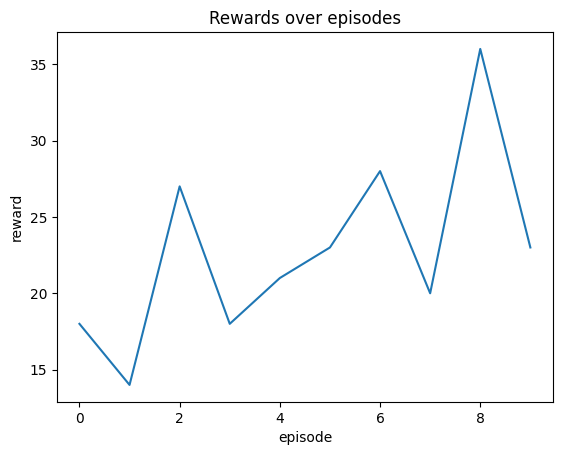

In [6]:
rand.plot_rewards()

In [54]:
class QAgent:
    def __init__(self, max_eps, alpha, gamma, epsilon):
        self.env = gym.make("CartPole-v1",  render_mode="human")
        self.max_eps = max_eps
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.reward_arr = np.empty(max_eps)
        self.avg_reward = 0.0
        
 
        self.q_table = [[0.0 for x in range(200)] for y in range(100)]
    
    
    def run(self):
        reward_avg = 0.0
        reward_sum = 0.0
        for episode in range(self.max_eps):
            reward_sum = 0.0
            done = False
            state = self.env.reset()
            pr = 0
            action = 0
            
            while not done:
                if random.uniform(0,1) < self.epsilon:
                    action = env.action_space.sample()
                    pr = action
                else:
#                     print("state[0]: {}".format(state[0]))
                    action = np.argmax(self.q_table[int(state[0][0])])
                    pr = action
                    
                next_state, reward, done, info, _ = self.env.step(action)
                reward_sum += reward
                
                old_value = self.q_table[int(next_state[0])][int(action)]
                next_max = self.q_table[int(next_state[0])]

                new_value = (1 - self.alpha) * old_value + self.alpha * (reward + self.gamma * next_max[0])
                
                self.q_table[int(state[0][0])][int(action)] = new_value
                
            print("Total reward at episode {}: {}".format(episode, reward_sum))
            self.reward_arr[episode]  = reward_sum
            reward_avg += reward_sum    
        
        self.avg_reward = reward_avg / float(self.max_eps)
        print("Average score across {} episodes: {}".format(self.max_eps, self.avg_reward))
        
        
    def plot_rewards(self):
        plt.title("Rewards over episodes")
        plt.xlabel("episode")
        plt.ylabel("reward")
        plt.plot(self.reward_arr)
        plt.show()
        
                

In [55]:
qAgent = QAgent(max_eps = 100, alpha = 0.1, gamma = 0.95, epsilon = 0.2)

In [56]:
qAgent.run()

Total reward at episode 0: 12.0
Total reward at episode 1: 9.0
Total reward at episode 2: 12.0
Total reward at episode 3: 9.0
Total reward at episode 4: 8.0
Total reward at episode 5: 8.0
Total reward at episode 6: 14.0
Total reward at episode 7: 11.0
Total reward at episode 8: 9.0
Total reward at episode 9: 10.0
Total reward at episode 10: 10.0
Total reward at episode 11: 10.0
Total reward at episode 12: 10.0
Total reward at episode 13: 12.0
Total reward at episode 14: 9.0
Total reward at episode 15: 11.0
Total reward at episode 16: 10.0
Total reward at episode 17: 10.0
Total reward at episode 18: 11.0
Total reward at episode 19: 9.0
Total reward at episode 20: 10.0
Total reward at episode 21: 11.0
Total reward at episode 22: 10.0
Total reward at episode 23: 10.0
Total reward at episode 24: 10.0
Total reward at episode 25: 8.0
Total reward at episode 26: 10.0
Total reward at episode 27: 10.0
Total reward at episode 28: 10.0
Total reward at episode 29: 8.0
Total reward at episode 30: 1

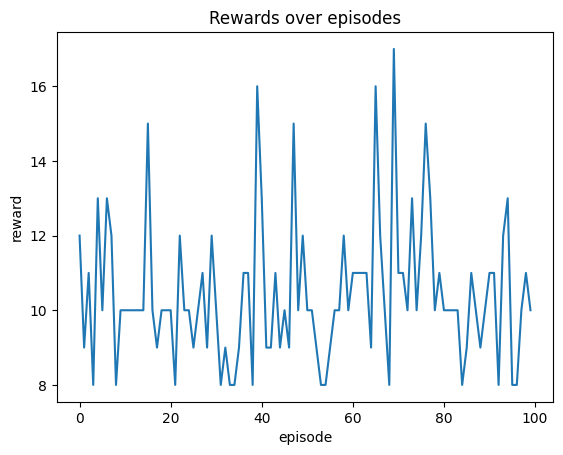

In [53]:
qAgent.plot_rewards()

In [ ]:

# state_space = 4 # number of states
# action_space = 2 # number of possible actions

# def Qtable(state_space,action_space,bin_size = 30):
    
#     bins = [np.linspace(-4.8,4.8,bin_size),
#             np.linspace(-4,4,bin_size),
#             np.linspace(-0.418,0.418,bin_size),
#             np.linspace(-4,4,bin_size)]
    
#     q_table = np.random.uniform(low=-1,high=1,size=([bin_size] * state_space + [action_space]))
#     return q_table, bins

# def Discrete(state, bins):
#     index = []
#     for i in range(len(state)): index.append(np.digitize(state[i],bins[i]) - 1)
#     return tuple(index)

In [ ]:
# def q_learning(q_table, bins, episodes = 5000, gamma = 0.95, lr = 0.1, timestep = 100, epsilon = 0.2):
    
#     rewards = 0
#     steps = 0
#     for episode in range(1,episodes+1):
#         steps += 1 
#         # env.reset() => initial observation
#         current_state = Discrete(env.reset(),bins)
#         for episode in range(1,episodes+1):
#         steps += 1 
#         # env.reset() => initial observation
#         current_state = Discrete(env.reset(),bins)
    

In [ ]:
# class Agent():
#     def __init__(self, env):
#         self.action_size = env.action_space.n
#         print("Action size:", self.action_size)
        
#     def get_action(self):
#         action = random.choice(range(self.action_size))
#         return action

In [ ]:
# agent = Agent(env)
# state = env.reset()

# for i in range(500):
# #     action = env.action_space.sample()
#     action = agent.get_action()
#     env.step(action)
#     env.render()